In [1]:
from numpy import fft as fft
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Tutorial


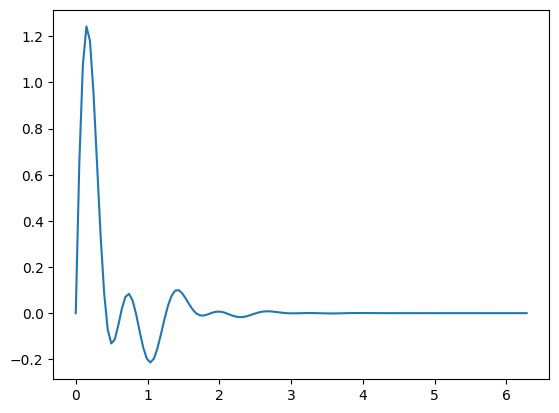

In [2]:
x = np.linspace(0,2*np.pi, 128)
a = .5
y = np.exp(-x/a)*(np.sin(10*x) + np.sin(5*x))

plt.plot(x,y)
plt.show()

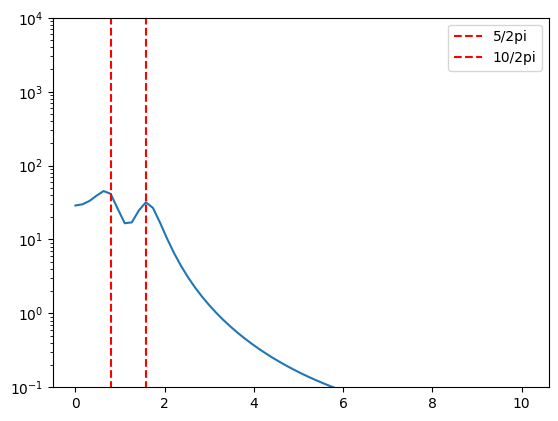

In [3]:
y_fft = fft.rfft(y)
freqs = fft.rfftfreq(len(y), d=x[1]-x[0])
plt.plot(freqs, np.abs(y_fft)**2)
plt.vlines(5/(2*np.pi),0,100000,colors="red", linestyles="--", label="5/2pi")
plt.vlines(10/(2*np.pi),0,100000,colors="red",linestyles="--", label="10/2pi")
plt.legend()
plt.yscale('log')
plt.ylim(1e-1,1e4)
plt.show()

## frequency 6,482,930

In [4]:
def find_pulse_end(signal, threshold_max, threshold_min):
  trigger = False
  print(signal[4])
  print(signal)
  for i in range(len(signal)):
    if (signal[i] > threshold_max):
      trigger = True
    if (trigger == True and signal[i] < threshold_min):
      return(i)
  return(0)

In [5]:
def chop_signal(signal, start):
  return(signal[start:])

In [6]:
def get_fft_from_FID(fft_df, threshold_max, threshold_min):
    time = fft_df['time']
    ch1 = fft_df['channel_1']

    print("This is the raw FID plot\n")
    plt.plot(time, ch1)
    plt.show()

    chop_point = find_pulse_end(ch1, 7.5, 6) 
    chopped_ch1 = chop_signal(ch1,chop_point) 
    chopped_time = chop_signal(time, chop_point) 

    print("this is the chopped plot\n")

    plt.plot(chopped_time, chopped_ch1)
    plt.show()

    ch1_fft = fft.rfft(chopped_ch1)
    freqs = fft.rfftfreq(len(chopped_ch1), d=time[1]-time[0])

    print("This is the fft plot")
    plt.plot(freqs, np.abs(ch1_fft)**2)
    plt.xlim(0,5500)

    return freqs, ch1_fft

    
    
    

In [7]:
fft_t2_df = pd.read_csv("pNMR_2.5_FFT_T2_data\pNMR2.5 FFT T2 data\Sick_aFIDS\FID_pulsetime63_waittime50_freq6485930.csv")

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\diyan\AppData\Local\Temp\ipykernel_30656\2309652948.py:1: SyntaxWarning: invalid escape sequence '\p'
  fft_t2_df = pd.read_csv("pNMR_2.5_FFT_T2_data\pNMR2.5 FFT T2 data\Sick_aFIDS\FID_pulsetime63_waittime50_freq6485930.csv")


In [8]:
cols = ['time', 'channel_1','channel_2']

fft_t2_df.columns = cols

fft_t2_df.head()

,time,channel_1,channel_2
0,-0.001278,0.0,0.0
1,-0.001276,0.0,0.0
2,-0.001274,0.0,0.0
3,-0.001272,0.0,0.0
4,-0.001270,0.0,0.0


In [9]:
time = fft_t2_df['time']
ch1 = fft_t2_df['channel_1']

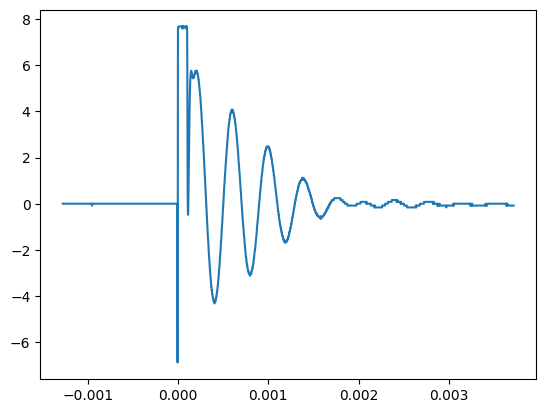

In [10]:
plt.plot(time, ch1)

In [11]:
chop_point = find_pulse_end(ch1, 7.5, 6) 
chopped_ch1 = chop_signal(ch1,chop_point) 
chopped_time = chop_signal(time, chop_point) 

0.0
0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
2494   -0.08
2495   -0.08
2496   -0.08
2497   -0.08
2498   -0.08
Name: channel_1, Length: 2499, dtype: float64


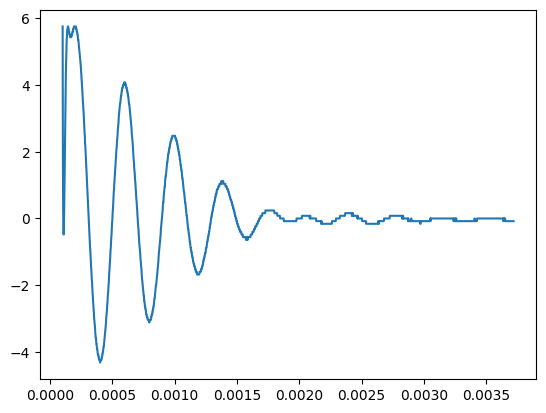

In [12]:
plt.plot(chopped_time, chopped_ch1)

In [ ]:
def Gauss(x, A, B):
    return A * np.exp(-B * x**2)

9
1313398.7983737944
Frequency is at 2487.562189054666 Hz


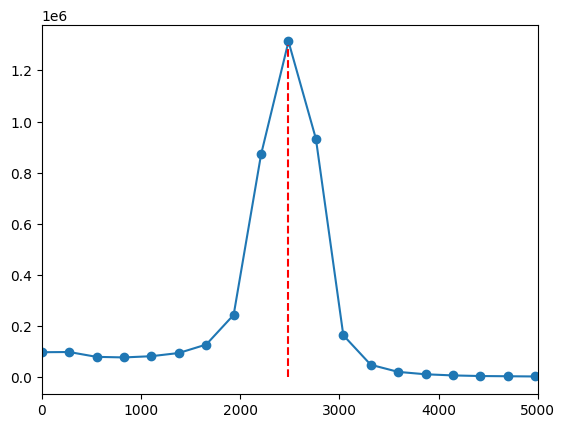

In [66]:
ch1_fft = fft.rfft(chopped_ch1)
freqs = fft.rfftfreq(len(chopped_ch1), d=time[1]-time[0])

outval = []

maxval = np.max(np.abs(ch1_fft)**2, axis=0)
maxi = np.argmax(np.abs(ch1_fft)**2, axis=0)

print(maxi)
print(maxval)

max_freq = freqs[maxi]



plt.scatter(freqs, np.abs(ch1_fft)**2)
plt.plot(freqs, np.abs(ch1_fft)**2)
plt.vlines(max_freq, 0,1.3e6,colors="red", linestyles="--", label=f"{maxval}")
plt.xlim(0,5000)

print(f"Frequency is at {max_freq} Hz")



In [ ]:
def lorenz(x, A, B):
    return A * np.exp(-B * x**2)

(0.000102, 0.003718)

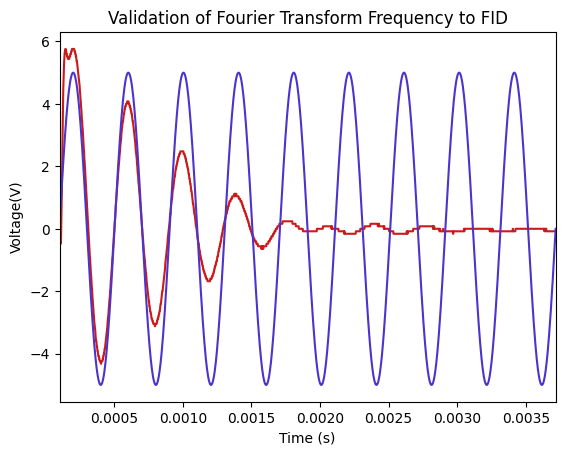

In [64]:


#many_i = np.linspace(0,2*np.pi, 160)
#many_i = np.linspace(0,1,100)
# t_range = chopped_time
# print(t_range)
plt.title("Validation of Fourier Transform Frequency to FID")
plt.xlabel("Time (s)")
plt.ylabel("Voltage(V)")

plt.plot(chopped_time, chopped_ch1,color = (0.8,0.1,0.1))
plt.plot(chopped_time, 5*np.sin(2*np.pi*max_freq*(chopped_time- 0.0001)), color = (0.3,0.2,0.8))
t_range = chopped_time.to_list()
plt.xlim(t_range[0], t_range[-1])

## More off freq

In [15]:
new_df = pd.read_csv("pNMR_2.5_FFT_T2_data/pNMR2.5 FFT T2 data/Sick_aFIDS/FID_pulsetime63_waittime50_freq6487930.csv")

In [16]:
cols = ['time', 'channel_1','channel_2']
new_df.columns = cols

new_df.head()

,time,channel_1,channel_2
0,-0.000798,0.0,0.0
1,-0.000796,0.0,0.0
2,-0.000794,0.0,0.0
3,-0.000792,0.0,0.0
4,-0.000790,0.0,0.0


This is the raw FID plot



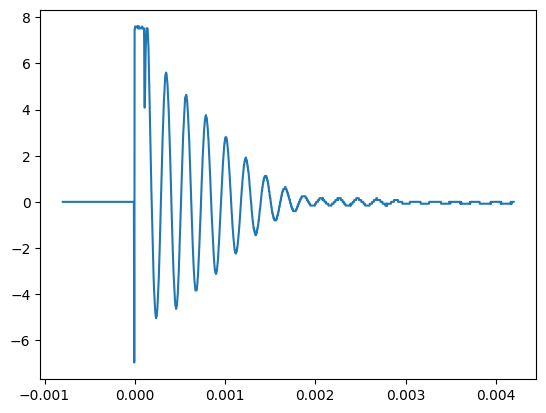

0.0
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2494    0.0
2495    0.0
2496    0.0
2497    0.0
2498    0.0
Name: channel_1, Length: 2499, dtype: float64
this is the chopped plot



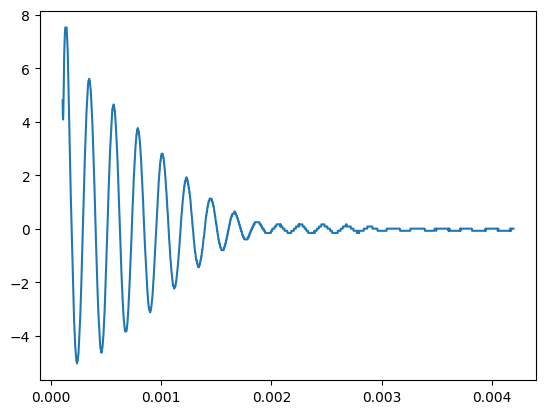

This is the fft plot


(array([0.00000000e+00, 2.44259893e+02, 4.88519785e+02, ...,
        2.49389350e+05, 2.49633610e+05, 2.49877870e+05], shape=(1024,)),
 array([186.8        +0.j        , 177.80477126-73.13622061j,
        142.24961008-64.64907007j, ...,   2.97313855 +0.25136287j,
          2.70980677 -0.66780015j,   1.5856525  -0.36776939j],
       shape=(1024,)))

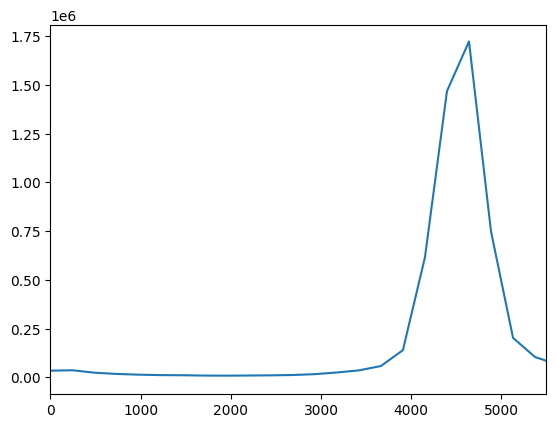

In [17]:
get_fft_from_FID(new_df, 7,6)